In [37]:
import geopandas as gpd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [3]:
pigs = gpd.read_file('gbif_sus_scroga_california/gbif_sus_scroga_california.shp')
pigs.head()

,gbifID,species,state,individual,day,month,year,inst,collection,catalogNum,identified,geometry
0,899953814,Sus scrofa,California,NaN,22.0,3.0,2014.0,iNaturalist,Observations,581956,edwardrooks,POINT (-121.53812 37.08846)
1,899951348,Sus scrofa,California,NaN,9.0,6.0,2007.0,iNaturalist,Observations,576047,Bruce Freeman,POINT (-120.54942 35.47354)
2,896560733,Sus scrofa,California,NaN,20.0,12.0,1937.0,MVZ,Hild,MVZ:Hild:195,"Museum of Vertebrate Zoology, University of Ca...",POINT (-122.27063 37.87610)
3,896559958,Sus scrofa,California,NaN,1.0,4.0,1969.0,MVZ,Hild,MVZ:Hild:1213,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.82297 38.44543)
4,896559722,Sus scrofa,California,NaN,1.0,1.0,1961.0,MVZ,Hild,MVZ:Hild:1004,"Museum of Vertebrate Zoology, University of Ca...",POINT (-121.74559 38.54882)


In [5]:
# type of the pigs dataframe 
print(type(pigs))

# type of the geometry column
print(type(pigs.geometry))

# type of the gbifID column
print(type(pigs.gbifID))

<class 'geopandas.geodataframe.GeoDataFrame'>
<class 'geopandas.geoseries.GeoSeries'>
<class 'pandas.core.series.Series'>


In [9]:
print(type(pigs.geometry[0]))

<class 'shapely.geometry.point.Point'>


In [10]:
pigs.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
pigs.total_bounds

array([-124.29448 ,   32.593433, -115.4356  ,   40.934296])

In [27]:
pigs.groupby('year').count().gbifID#.plot(kind='bar')

year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: gbifID, Length: 61, dtype: int64

In [33]:
pigs.year.value_counts().sort_index()

year
1818.0     31
1910.0      1
1925.0      1
1927.0      4
1929.0      3
         ... 
2019.0    101
2020.0    159
2021.0    164
2022.0    185
2023.0     98
Name: count, Length: 61, dtype: int64

In [50]:
pigs_recent = pigs[pigs.year>=2020]
print(len(pigs))
len(pigs_recent)

1046


606

<AxesSubplot:>

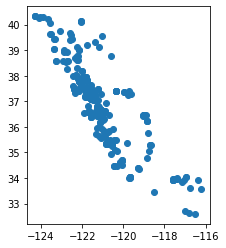

In [51]:
pigs_recent.plot()

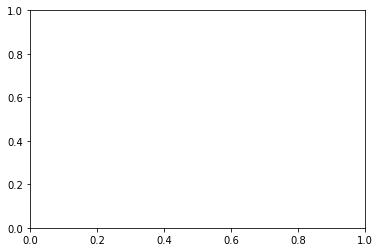

In [53]:
fig, ax = plt.subplots()

#plt.show()

In [ ]:
fig, ax = plt.subplots()
pigs_recent.plot(ax=ax,
                 alpha=0.5,
                 column='year',
                 legend=True
                 )

ax.set_title('Reported "Sus scrofa" sightings in CA (200-2023)')
plt.show()

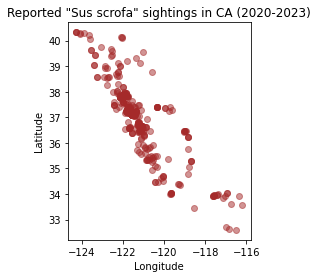

In [59]:
fig, ax = plt.subplots()
pigs_recent.plot(ax=ax,
                 alpha=0.5,
                 color='brown'
                 )

ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [60]:
ca = gpd.read_file('ca-state-boundary/CA_State_TIGER2016.shp')
ca

,REGION,DIVISION,STATEFP,STATENS,GEOID,STUSPS,NAME,LSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,4,9,06,01779778,06,CA,California,00,G4000,A,403501101370,20466718403,+37.1551773,-119.5434183,"MULTIPOLYGON (((-13317677.375 3930590.808, -13..."


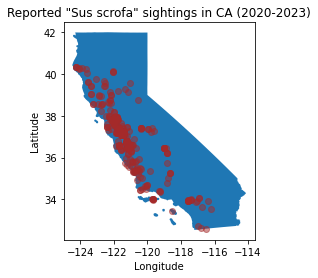

In [67]:
fig, ax = plt.subplots()
ca.plot(ax=ax)

pigs_recent.plot(ax=ax,
                 alpha=0.5,
                 color='brown'
                 )

ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

In [68]:
ca.to_file('ca-boundary.shp')

In [69]:
ca_new = gpd.read_file('ca-boundary/ca-boundary.shp')

In [71]:
# initialize empty figure
fig, ax = plt.subplots()

# add CA polygon to axis
ca_new.plot(ax=ax)

# add data to axis
# notice customization happens as arguments in plot()
pigs_recent.plot(ax=ax,
                 alpha=0.5,
                 color='brown')

# update axis 
# customization separate from the data plotting
ax.set_title('Reported "Sus scrofa" sightings in CA (2020-2023)')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# display figure
plt.show()

SyntaxError: invalid syntax (3632984855.py, line 15)